In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Make project modules importable when running notebook from /tasks
import os, sys
PROJECT_ROOT = os.path.abspath(os.path.join(os.getcwd(), ".."))
if PROJECT_ROOT not in sys.path:
    sys.path.insert(0, PROJECT_ROOT)

from tasks.spirals import TwoSpirals
from tasks.gaussians import TwoGaussians
from tasks.circles import TwoCircles
from tasks.sinesquare import SineSquare


/home/maxime/miniconda3/envs/qrc_env/lib/python3.14/site-packages/numpy/_core/getlimits.py:552: UserWarning: Signature b'\x00\xd0\xcc\xcc\xcc\xcc\xcc\xcc\xfb\xbf\x00\x00\x00\x00\x00\x00' for <class 'numpy.longdouble'> does not match any known type: falling back to type probe function.
This warnings indicates broken support for the dtype!
  machar = _get_machar(dtype)


In [2]:
def plot_task(task, n_samples=256, seed=0, elev=20, azim=45):
    """
    Universal task plotter.
    Handles both 2D and 3D tasks depending on input_dim.
    """

    X, y = task.make_dataset(n_samples=n_samples, seed=seed)

    if task.input_dim == 2:
        # -------------------------
        # 2D scatter plot
        # -------------------------
        plt.figure(figsize=(5, 5))
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap="coolwarm", s=20, alpha=0.9)
        plt.xlabel("x1")
        plt.ylabel("x2")
        plt.title(f"Task: {task.name}")
        plt.axis("equal")
        plt.grid(alpha=0.3)
        plt.show()

    elif task.input_dim == 3:
        # -------------------------
        # 3D scatter plot
        # -------------------------
        fig = plt.figure(figsize=(6, 6))
        ax = fig.add_subplot(111, projection='3d')

        ax.scatter(
            X[:, 0], X[:, 1], X[:, 2],
            c=y, cmap="coolwarm", s=15, alpha=0.8
        )

        ax.set_xlabel("x1")
        ax.set_ylabel("x2")
        ax.set_zlabel("x3")
        ax.view_init(elev=elev, azim=azim)
        ax.set_title(f"Task: {task.name}")

        plt.show()

    else:
        raise ValueError(f"Cannot plot task of dimension {task.input_dim}. Only 2D or 3D.")


In [3]:
def plot_1d_sequence(task, n_samples=200, seed=0):
    """
    Plot a 1D sequence task: values over time with labels (0/1) shown as background bands.
    """
    X, y = task.make_dataset(n_samples=n_samples, seed=seed)
    t = np.arange(len(X))

    plt.figure(figsize=(10, 3))
    plt.plot(t, X[:, 0], label='input', color='C0', linewidth=2)

    # Shade regions for labels
    ymin, ymax = X[:, 0].min(), X[:, 0].max()
    for i in range(len(y)):
        color = 'C1' if y[i] == 1 else 'C2'
        plt.axvspan(i - 0.5, i + 0.5, color=color, alpha=0.08)

    plt.xlabel('timestep')
    plt.ylabel('value')
    plt.title(f"Task: {task.name} | green=sine(0), orange=square(1)")
    plt.grid(alpha=0.3)
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Show class balance
    unique, counts = np.unique(y, return_counts=True)
    print({int(k): int(v) for k, v in zip(unique, counts)})


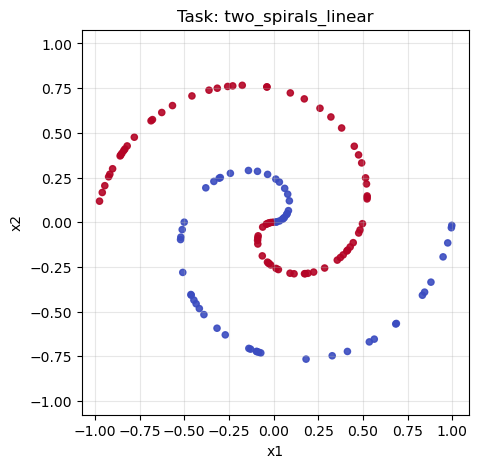

In [4]:
# TwoSpirals
task_spiral = TwoSpirals(spiral_type="linear")
plot_task(task_spiral, n_samples=128, seed=0)


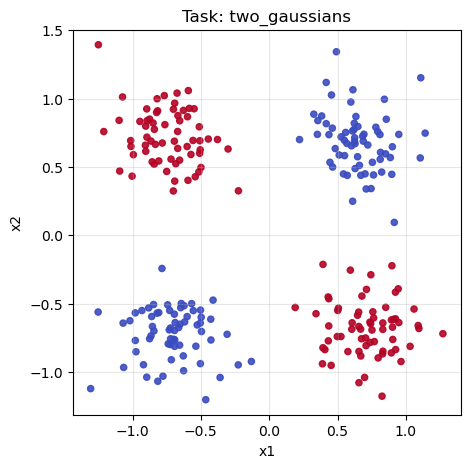

In [5]:
# TwoGaussians
task_gauss = TwoGaussians()
plot_task(task_gauss, n_samples=256, seed=1)


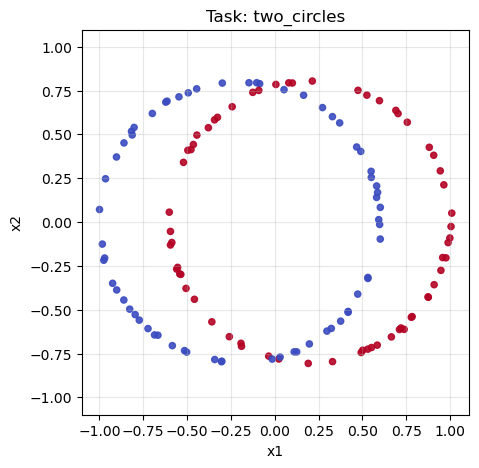

In [6]:
task = TwoCircles(
    r0=0.8, center0=(-0.2, 0),
    r1=0.8, center1=(0.2, 0),
    noise=0.005
)
plot_task(task, n_samples=128, seed=0)


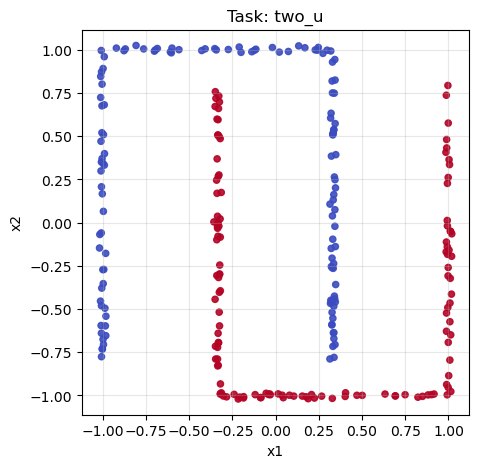

In [7]:
from tasks.two_u import TwoU

task = TwoU(noise=0.01)
plot_task(task, n_samples=256, seed=0)


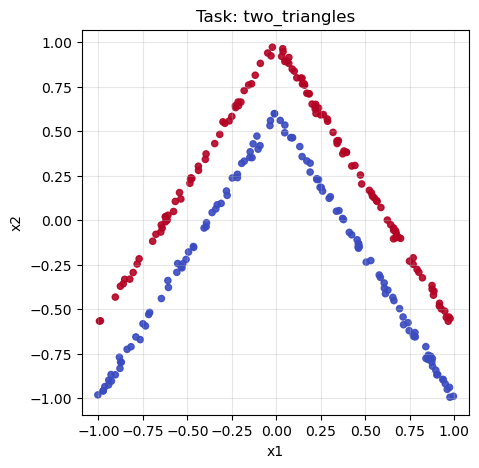

In [8]:
from tasks.two_triangles import TwoTriangles

task = TwoTriangles(noise=0.01)
plot_task(task, n_samples=256, seed=0)

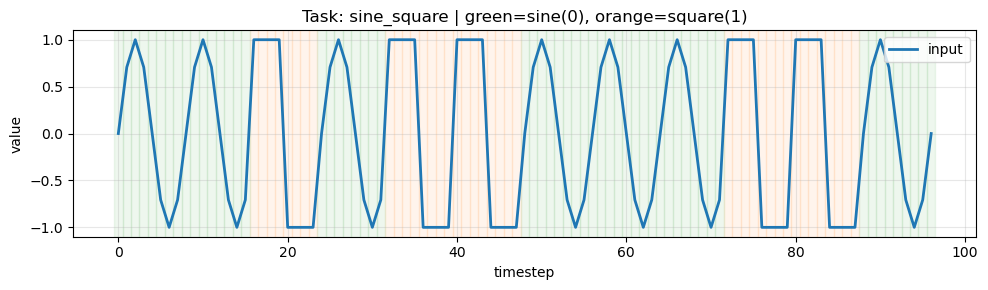

{0: 57, 1: 40}


In [17]:
# SineSquare 1D task
ss_task = SineSquare(sequence_length=200, sine_prob=0.5)
plot_1d_sequence(ss_task, n_samples=97, seed=2)
